# DATA EXPLORATION


## NUMBER OF IMAGES FOR EACH CATEGORY


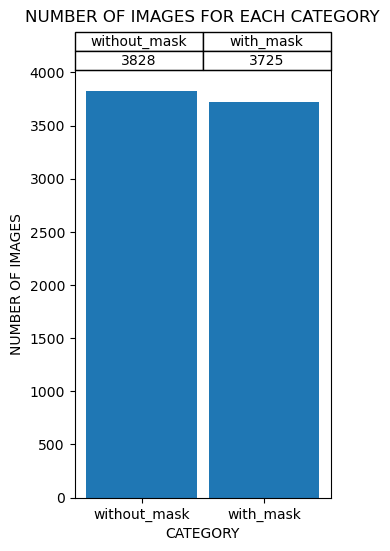

In [1]:
from os import listdir
from matplotlib import pyplot
%matplotlib inline

def displayImagesNumber(dir_path, title, x_label, y_label):
	categories = []
	number_of_images = []

	for category in listdir(dir_path):
		categories.append(category)
		number_of_images.append(len(listdir(dir_path + '//' + category)))

	pyplot.title(label = title, pad = 35)
	pyplot.table(colLabels = categories, cellText = [number_of_images], cellLoc = "center", loc = "top")
	pyplot.bar(categories, number_of_images, width = 0.9)
	pyplot.xlabel(x_label)
	pyplot.ylabel(y_label)
	pyplot.subplots_adjust(top = 1, left = 0.5)

displayImagesNumber(dir_path = ".//dataset", title = "NUMBER OF IMAGES FOR EACH CATEGORY", x_label = "CATEGORY", y_label = "NUMBER OF IMAGES")


In [2]:
from PIL import Image

without_mask_images = [Image.open(".//dataset//without_mask//" + image_file) for image_file in listdir(".//dataset//without_mask")]
with_mask_images = [Image.open(".//dataset//with_mask//" + image_file) for image_file in listdir(".//dataset//with_mask")]


## SAMPLE IMAGES


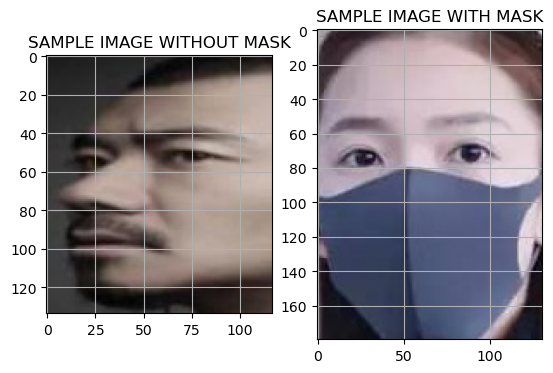

In [3]:
def displaySample(samples):
	f = pyplot.figure()

	for i in range(len(samples)):
		f.add_subplot(1, 2, (i + 1))
		pyplot.title(label = "SAMPLE IMAGE WITHOUT MASK") if i == 0 else pyplot.title(label = "SAMPLE IMAGE WITH MASK")
		pyplot.imshow(samples[i][667])
		pyplot.grid(True)

displaySample(samples = [without_mask_images, with_mask_images])


## SIZE OF IMAGES


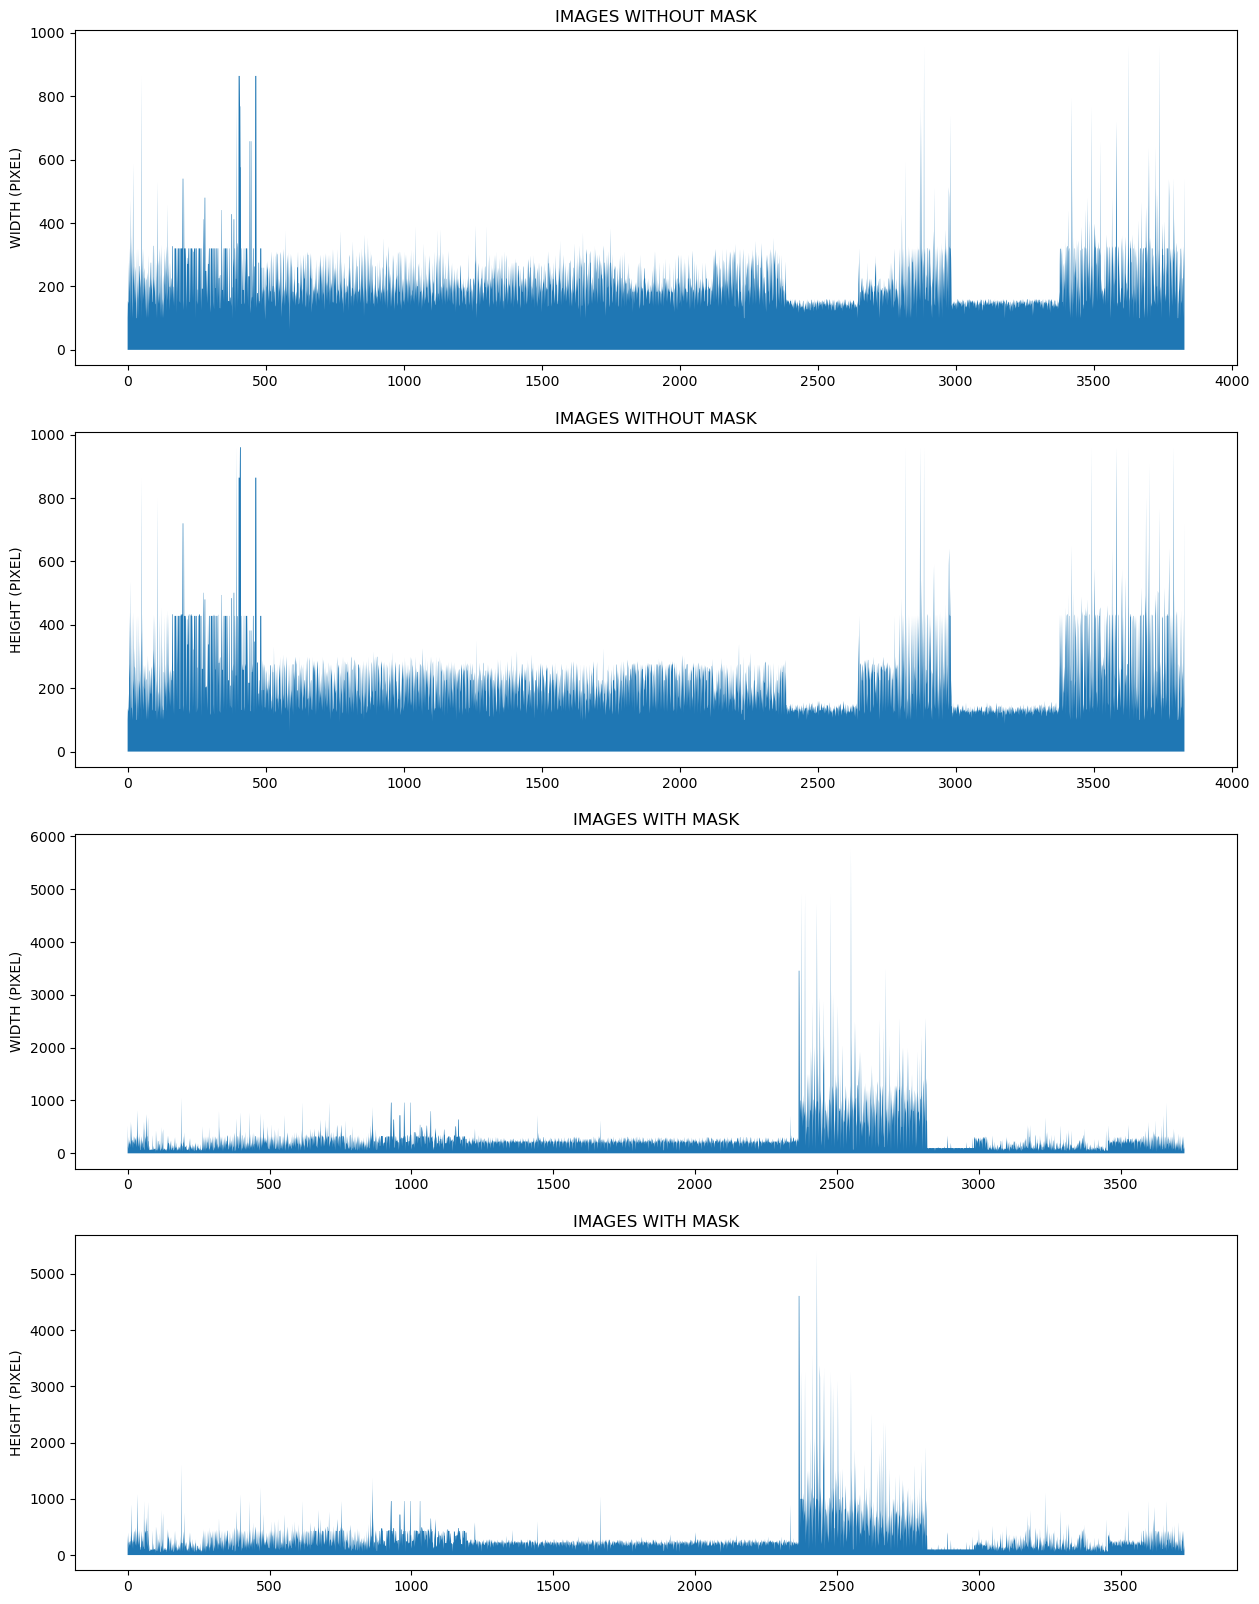

In [4]:
def displaySize(images):
	f = pyplot.figure(figsize = (15, 20))
	a = 1

	for b in range(len(images)):
		for c in range(len(images[b][0].size)):
			f.add_subplot(4, 1, a)
			x = [i for i in range(len(images[b]))]
			y = [image.size[c] for image in images[b]]
			pyplot.title(label = "IMAGES WITHOUT MASK") if b == 0 else pyplot.title(label = "IMAGES WITH MASK")
			pyplot.fill_between(x, 0, y)
			pyplot.ylabel("WIDTH (PIXEL)") if c == 0 else pyplot.ylabel("HEIGHT (PIXEL)")

			a += 1

displaySize(images = [without_mask_images, with_mask_images])


## COLOUR MODE OF IMAGES


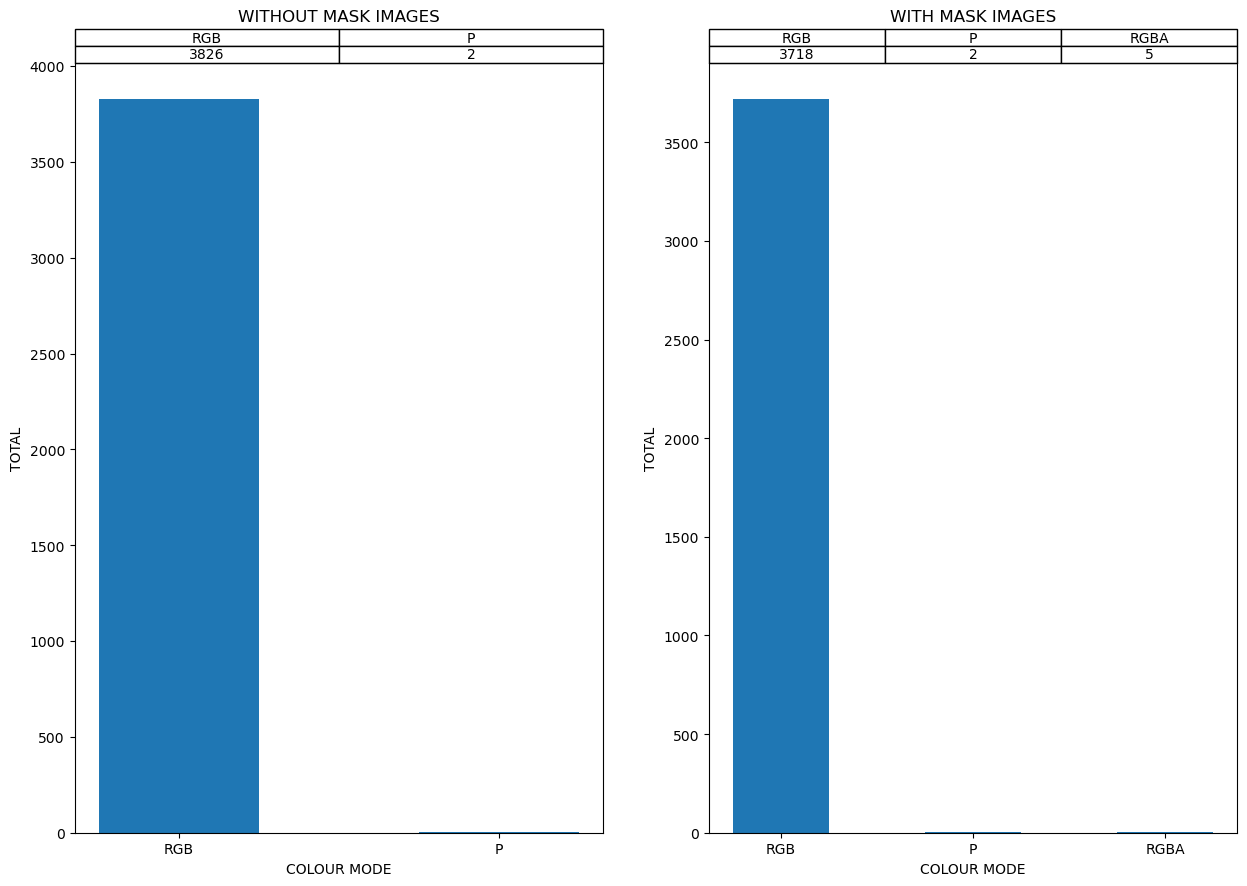

In [5]:
from collections import Counter

def displayColourMode(images):
	f = pyplot.figure(figsize = (15, 10))
	colour_modes = [[], []]

	for a in range(len(images)):
		for image in images[a]:
			colour_modes[a].append(image.mode)

	total_colour_mode_list = [Counter(colour_mode) for colour_mode in colour_modes]

	for i in range(len(total_colour_mode_list)):
		f.add_subplot(1, 2, (i + 1))
		pyplot.title(label = "WITHOUT MASK IMAGES", pad = 30) if i == 0 else pyplot.title(label = "WITH MASK IMAGES", pad = 30)
		pyplot.table(colLabels = list(total_colour_mode_list[i].keys()), cellText = [list(total_colour_mode_list[i].values())], cellLoc = "center", loc = "top")
		pyplot.bar(list(total_colour_mode_list[i].keys()), list(total_colour_mode_list[i].values()), width = 0.5)
		pyplot.xlabel("COLOUR MODE")
		pyplot.ylabel("TOTAL")

displayColourMode(images = [without_mask_images, with_mask_images])


# IMAGE PROCESSING


## RESIZE IMAGES


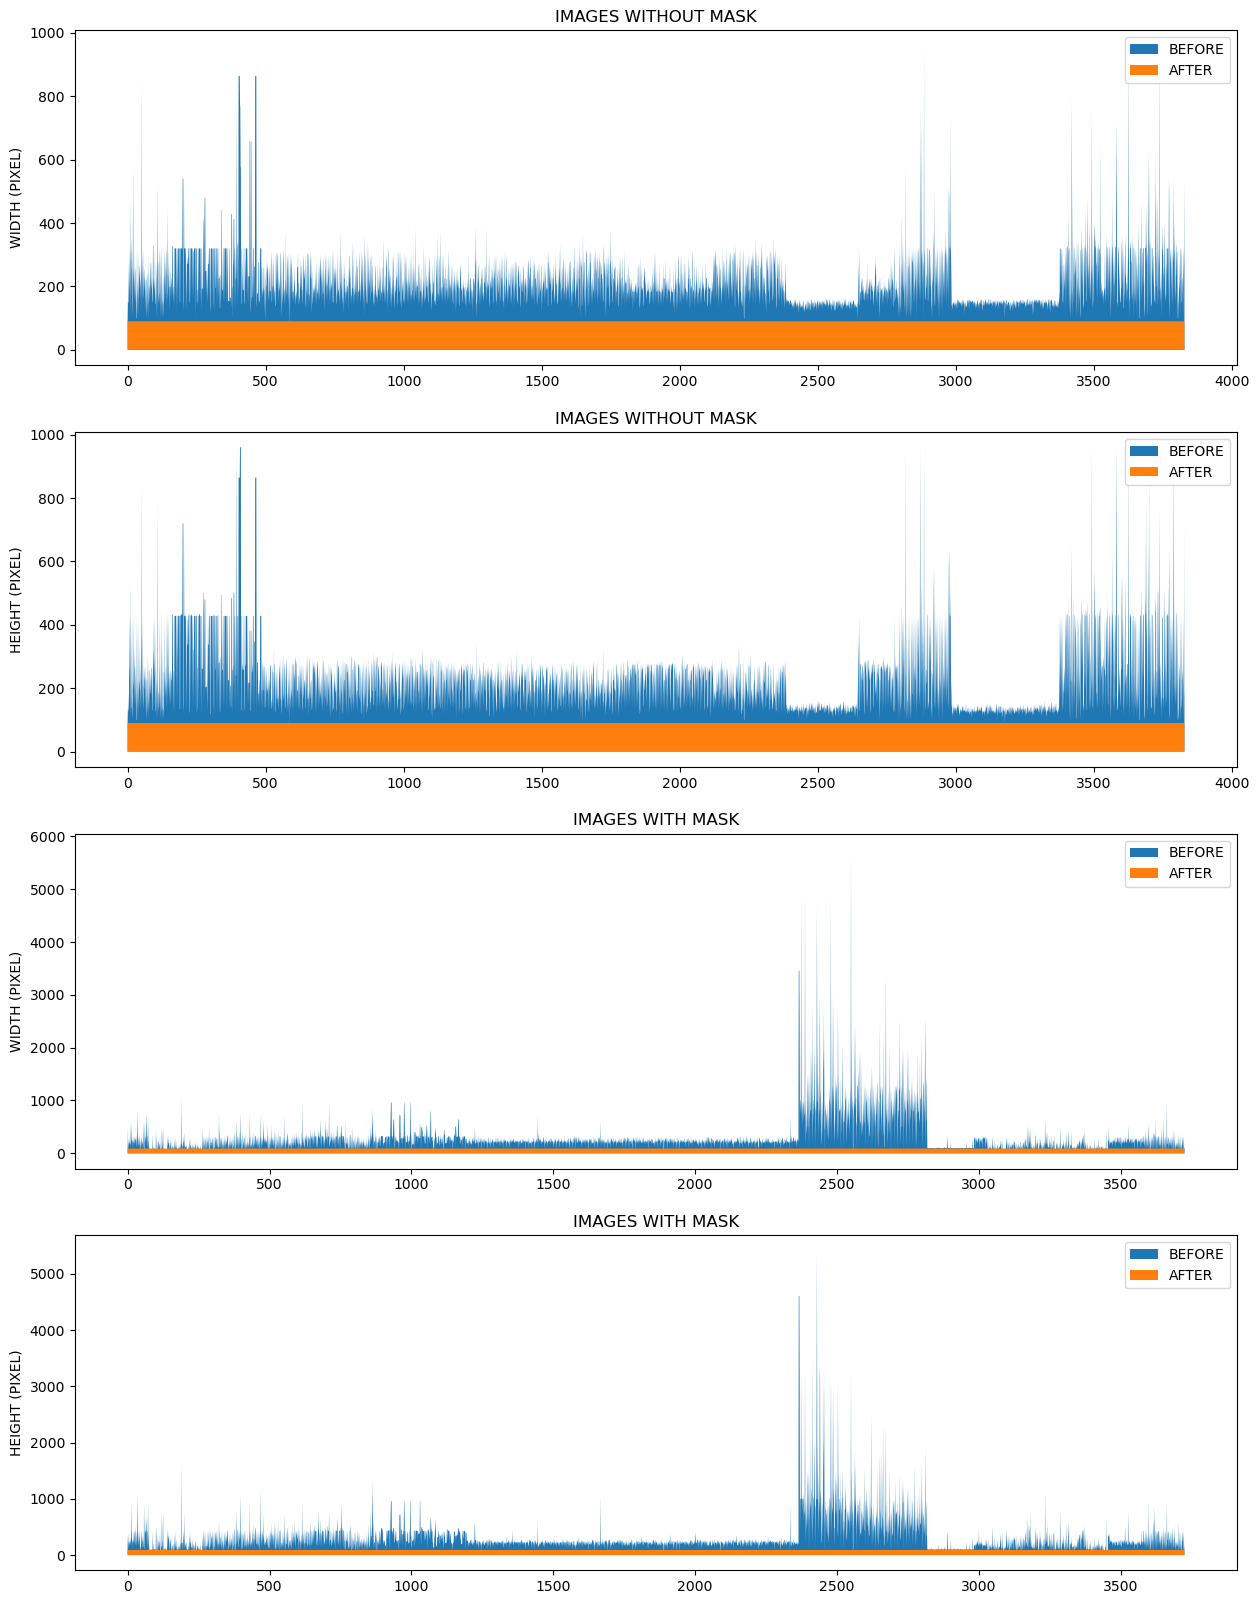

In [6]:
def resizeImages(images, width, height):
	resized_images = []

	for img in images:
		resized_images.append(img.resize((width, height)))

	return resized_images

def compareBeforeAfterResize(before_resize, after_resize):
	f = pyplot.figure(figsize = (15, 20))
	a = 1

	for b in range(len(before_resize)):
		for c in range(len(before_resize[b][0].size)):
			f.add_subplot(4, 1, a)
			x = [i for i in range(len(before_resize[b]))]
			y_before = [image.size[c] for image in before_resize[b]]
			y_after = [image.size[c] for image in after_resize[b]]
			pyplot.title(label = "IMAGES WITHOUT MASK") if b == 0 else pyplot.title(label = "IMAGES WITH MASK")
			pyplot.fill_between(x, 0, y_before, label = "BEFORE")
			pyplot.fill_between(x, 0, y_after, label = "AFTER")
			pyplot.legend()
			pyplot.ylabel("WIDTH (PIXEL)") if c == 0 else pyplot.ylabel("HEIGHT (PIXEL)")

			a += 1

resized_without_mask_images = resizeImages(images = without_mask_images, width = 90, height = 90)
resized_with_mask_images = resizeImages(images = with_mask_images, width = 90, height = 90)

compareBeforeAfterResize(before_resize = [without_mask_images, with_mask_images], after_resize = [resized_without_mask_images, resized_with_mask_images])


## COLOUR MODE CONVERSION


c:\Users\DELL\anaconda3\envs\tf-test\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


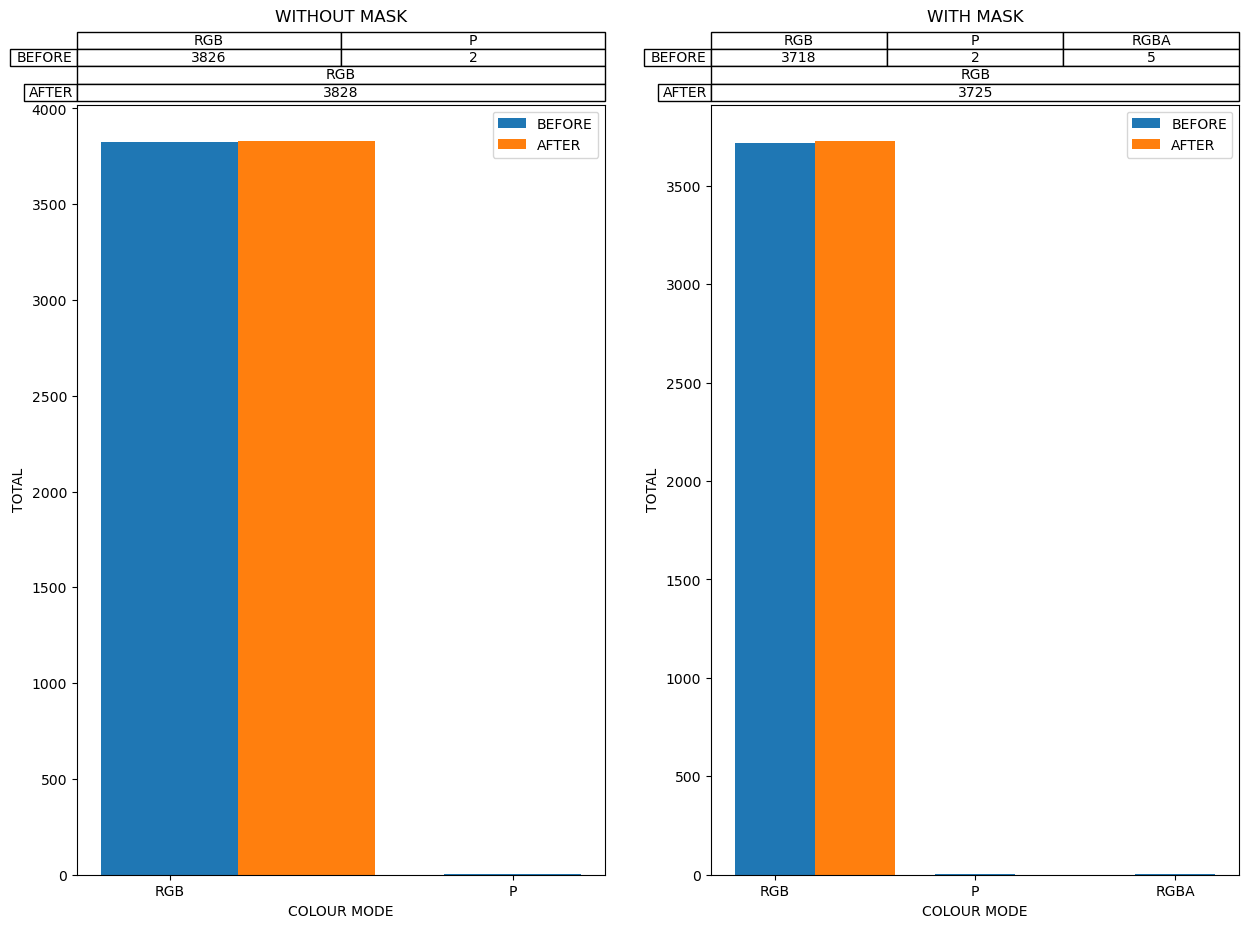

In [7]:
from numpy import arange

def colourModeConversion(images, colour_mode):
	colour_mode_converted = []

	for image in images:
		colour_mode_converted.append(image.convert(colour_mode))

	return colour_mode_converted

def compareBeforeAfterColourModeConversion(images_before_after):
	f = pyplot.figure(figsize = (15, 10))
	colour_modes_before_after = [[[], []], [[], []]]

	for i in range(len(images_before_after)):
		for j in range(len(images_before_after[i])):
			for image in images_before_after[i][j]:
				colour_modes_before_after[i][j].append(image.mode)

	total_colour_mode_list = [[Counter(colour_mode) for colour_mode in colour_mode_list] for colour_mode_list in colour_modes_before_after]

	for a in range(len(total_colour_mode_list)):
		f.add_subplot(1, 2, (a + 1))
		pyplot.title(label = "WITHOUT MASK", pad = 60) if a == 0 else pyplot.title(label = "WITH MASK", pad = 60)
		pyplot.table(colLabels = list(total_colour_mode_list[a][0].keys()), rowLabels = ["BEFORE"], cellText = [list(total_colour_mode_list[a][0].values())], cellLoc = "center", loc = "top", bbox = [0, 1.05, 1, 0.045])
		pyplot.table(colLabels = list(total_colour_mode_list[a][1].keys()), rowLabels = ["AFTER"], cellText = [list(total_colour_mode_list[a][1].values())], cellLoc = "center", loc = "top", bbox = [0, 1.005, 1, 0.045])
		pyplot.bar(list(total_colour_mode_list[a][0].keys()), list(total_colour_mode_list[a][0].values()), label = "BEFORE", width = 0.4)
		pyplot.bar([(x + 0.4) for x in arange(len(list(total_colour_mode_list[a][1].keys())))], list(total_colour_mode_list[a][1].values()), label = "AFTER", width = 0.4)
		pyplot.legend()
		pyplot.xlabel("COLOUR MODE")
		pyplot.ylabel("TOTAL")

colour_mode_without_mask_converted = colourModeConversion(images = resized_without_mask_images, colour_mode = "RGB")
colour_mode_with_mask_converted = colourModeConversion(images = resized_with_mask_images, colour_mode = "RGB")

compareBeforeAfterColourModeConversion(images_before_after = [[resized_without_mask_images, colour_mode_without_mask_converted], [resized_with_mask_images, colour_mode_with_mask_converted]])


## CONVERT IMAGES TO ARRAY


In [8]:
from numpy import array, ndarray

def convertImageToArray(without_mask, with_mask):
	return [array(image) for image in without_mask] + [array(image) for image in with_mask]

def imageToArrayValidation(array_list):
	valid = True

	for a in (array_list):
		if type(a) != ndarray:
			valid = False
			break

	return valid

def arrayDimensionCheck(array_list):
	same = True
	sample = array_list[0].shape

	for a in (array_list):
		if a.shape != sample:
			same = False
			break

	return same

array_images = convertImageToArray(without_mask = colour_mode_without_mask_converted, with_mask = colour_mode_with_mask_converted)

if imageToArrayValidation(array_list = array_images):
	print(f"{len(array_images)} IMAGES ARE CONVERTED TO ARRAY")
	print("ALL ARRAY HAVE SAME DIMENSION:", array_images[0].shape) if arrayDimensionCheck(array_list = array_images) else print("SOME ARRAY HAVE DIFFERENT DIMENSION")
	print("SAMPLE DATA:")
	print(array_images[0])
else:
	print("ALL IMAGES ARE NOT CONVERTED TO ARRAY")


7553 IMAGES ARE CONVERTED TO ARRAY
ALL ARRAY HAVE SAME DIMENSION: (90, 90, 3)
SAMPLE DATA:
[[[248 248 248]
  [248 248 248]
  [248 248 248]
  ...
  [246 246 246]
  [246 246 246]
  [246 246 246]]

 [[248 248 248]
  [248 248 248]
  [248 248 248]
  ...
  [246 246 246]
  [246 246 246]
  [246 246 246]]

 [[249 249 249]
  [249 249 249]
  [249 249 249]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 ...

 [[ 29  29  29]
  [ 43  43  43]
  [ 47  47  47]
  ...
  [ 37  37  37]
  [ 27  27  27]
  [ 25  25  25]]

 [[ 36  36  36]
  [ 45  45  45]
  [ 47  47  47]
  ...
  [ 38  38  38]
  [ 28  28  28]
  [ 27  27  27]]

 [[ 38  38  38]
  [ 46  46  46]
  [ 51  51  51]
  ...
  [ 36  36  36]
  [ 27  27  27]
  [ 26  26  26]]]


## DATA SCALING


In [9]:
from numpy import all

scaled_data = (array(array_images) / 255).astype("float32")

if all((scaled_data >= 0) & (scaled_data <= 1)):
	print(f"{scaled_data.shape[0]} DATA ARE SCALED")
	print(f"DATA TYPE OF DATA: {scaled_data.dtype}")
	print("SAMPLE DATA:")
	print(scaled_data[0])
else:
	print("SOME OF THE DATA ARE NOT SCALE")


7553 DATA ARE SCALED
DATA TYPE OF DATA: float32
SAMPLE DATA:
[[[0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  ...
  [0.9647059  0.9647059  0.9647059 ]
  [0.9647059  0.9647059  0.9647059 ]
  [0.9647059  0.9647059  0.9647059 ]]

 [[0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  ...
  [0.9647059  0.9647059  0.9647059 ]
  [0.9647059  0.9647059  0.9647059 ]
  [0.9647059  0.9647059  0.9647059 ]]

 [[0.9764706  0.9764706  0.9764706 ]
  [0.9764706  0.9764706  0.9764706 ]
  [0.9764706  0.9764706  0.9764706 ]
  ...
  [0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]]

 ...

 [[0.11372549 0.11372549 0.11372549]
  [0.16862746 0.16862746 0.16862746]
  [0.18431373 0.18431373 0.18431373]
  ...
  [0.14509805 0.14509805 0.14509805]
  [0.10588235 0.10588235 0.10588235]
  [0.09803922 0.09803922 0.09803922]]

 [[0.14117648

# DATA LABELLING


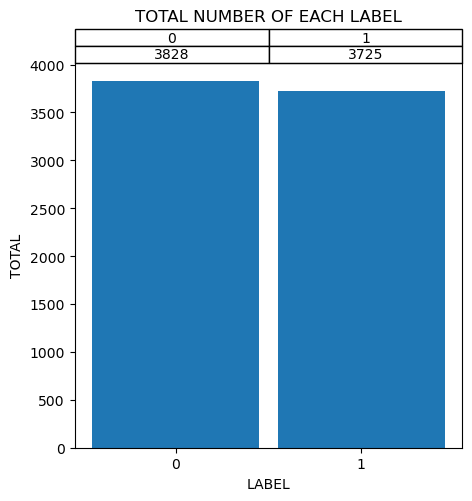

In [10]:
def dataLabel(without_mask, with_mask):
	labels_without_mask = [0 for i in range(len(without_mask))]
	labels_with_mask = [1 for j in range(len(with_mask))]

	return labels_without_mask + labels_with_mask

def displayLabel(labels, title, x_label, y_label):
	total_labels = Counter(labels)
	f = pyplot.figure(figsize = (5, 5))

	pyplot.title(label = title, pad = 30)
	pyplot.table(colLabels = list(total_labels.keys()), cellText = [list(total_labels.values())], cellLoc = "center", loc = "top")
	pyplot.bar(list(str(label) for label in total_labels.keys()), list(total_labels.values()), width = 0.9)
	pyplot.xlabel(x_label)
	pyplot.ylabel(y_label)

labels = dataLabel(without_mask = without_mask_images, with_mask = with_mask_images)

displayLabel(labels = labels, title = "TOTAL NUMBER OF EACH LABEL", x_label = "LABEL", y_label = "TOTAL")


# TRAIN TEST SPLIT


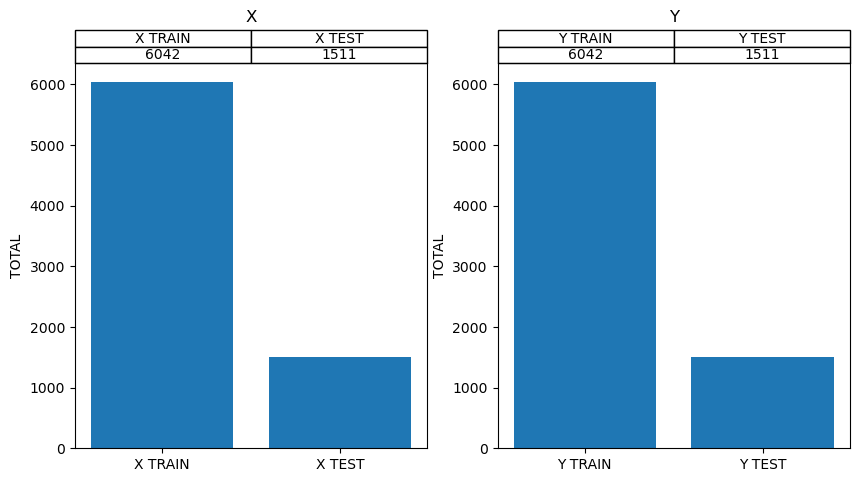

In [11]:
from sklearn.model_selection import train_test_split

def comapareTrainTest(data):
	f = pyplot.figure(figsize = (10, 5))
	labels = [["X TRAIN", "X TEST"], ["Y TRAIN", "Y TEST"]]

	for i in range(len(data)):
		f.add_subplot(1, 2, (i + 1))
		pyplot.title(label = "X", pad = 30) if i == 0 else pyplot.title(label = "Y", pad = 30)
		pyplot.table(colLabels = labels[i], cellText = [[data[i][0].shape[0], data[i][1].shape[0]]], cellLoc = "center", loc = "top")
		pyplot.bar(labels[i], [data[i][0].shape[0], data[i][1].shape[0]])
		pyplot.ylabel("TOTAL")

x_train, x_test, y_train, y_test = train_test_split(scaled_data, array(labels), test_size = 0.2, random_state = 42)

comapareTrainTest(data = [[x_train, x_test], [y_train, y_test]])


# MODELING


## MODEL BUILDING


In [12]:
from tensorflow.keras import Sequential, layers

def modelBuild(input_shape):
	model = Sequential()

	model.add(layers.Conv2D(32, kernel_size = (3, 3), activation = "relu", input_shape = input_shape))
	model.add(layers.MaxPooling2D(pool_size = (2, 2)))

	model.add(layers.Conv2D(64, kernel_size = (3, 3), activation = "relu"))
	model.add(layers.MaxPooling2D(pool_size = (2, 2)))

	model.add(layers.Flatten())

	model.add(layers.Dense(128, activation = "relu"))
	model.add(layers.Dropout(0.2))

	model.add(layers.Dense(64, activation = "relu"))
	model.add(layers.Dropout(0.2))

	model.add(layers.Dense(2, activation = "sigmoid"))

	model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

	return model

model = modelBuild(x_train[0].shape)


## MODEL TRAINING


Epoch 1/15
161/161 [==============================] - 9s 32ms/step - loss: 0.3797 - accuracy: 0.8331 - val_loss: 0.2739 - val_accuracy: 0.8897
Epoch 2/15
161/161 [==============================] - 5s 28ms/step - loss: 0.2327 - accuracy: 0.9075 - val_loss: 0.2652 - val_accuracy: 0.8798
Epoch 3/15
161/161 [==============================] - 5s 28ms/step - loss: 0.1707 - accuracy: 0.9260 - val_loss: 0.2593 - val_accuracy: 0.8986
Epoch 4/15
161/161 [==============================] - 5s 30ms/step - loss: 0.1339 - accuracy: 0.9482 - val_loss: 0.2408 - val_accuracy: 0.9195
Epoch 5/15
161/161 [==============================] - 5s 29ms/step - loss: 0.0878 - accuracy: 0.9665 - val_loss: 0.2494 - val_accuracy: 0.9184
Epoch 6/15
161/161 [==============================] - 5s 28ms/step - loss: 0.0753 - accuracy: 0.9739 - val_loss: 0.3483 - val_accuracy: 0.9019
Epoch 7/15
161/161 [==============================] - 5s 29ms/step - loss: 0.0635 - accuracy: 0.9792 - val_loss: 0.2806 - val_accuracy: 0.9272

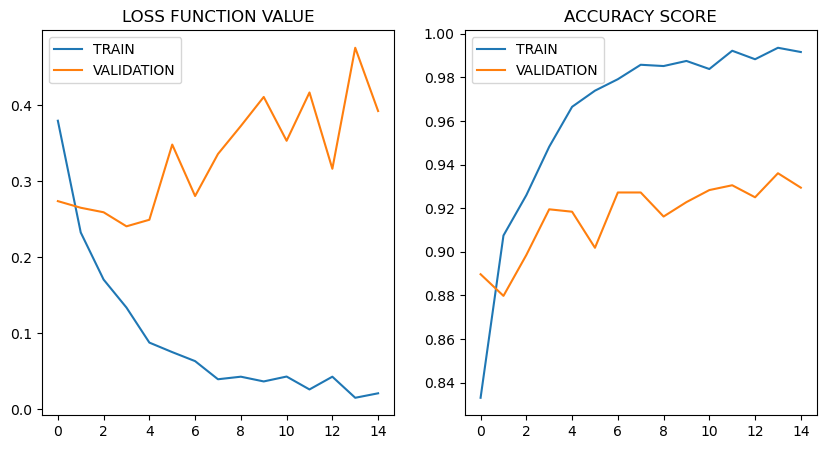

In [13]:
def displayTrainingProgress(model):
	f = pyplot.figure(figsize = (10, 5))
	metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]

	for i in range(len(metrics)):
		f.add_subplot(1, 2, (i + 1))
		pyplot.title(label = "LOSS FUNCTION VALUE") if i == 0 else pyplot.title(label = "ACCURACY SCORE")
		pyplot.plot(model.history[metrics[i][0]], label = "TRAIN")
		pyplot.plot(model.history[metrics[i][1]], label = "VALIDATION")
		pyplot.legend()

m = model.fit(x_train, y_train, validation_split = 0.15, epochs = 15)

displayTrainingProgress(model = m)


## MODEL EVALUATION


In [14]:
from sklearn.metrics import classification_report
from numpy import argmax

loss_function_value, accuracy_score = model.evaluate(x_test, y_test)
y_predict = argmax(model.predict(x_test), axis = 1)

print(f"LOSS FUNCTION VALUE: {loss_function_value: .2f}")
print(classification_report(y_test, y_predict))

model.save("model.h5")


48/48 [==============================] - 0s 7ms/step
LOSS FUNCTION VALUE:  0.39
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       779
           1       0.96      0.91      0.93       732

    accuracy                           0.93      1511
   macro avg       0.94      0.93      0.93      1511
weighted avg       0.94      0.93      0.93      1511

